<a href="https://colab.research.google.com/github/pranao0609/DL_Projects/blob/main/5_Image_Augentation_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [ ]:
augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2,
                           contrast=0.2,
                           saturation=0.2),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

In [ ]:
augmented_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=augmentations)
loader = torch.utils.data.DataLoader(augmented_data, batch_size=8, shuffle=True)

100%|██████████| 170M/170M [00:02<00:00, 66.0MB/s]


In [ ]:
images, labels = next(iter(loader))
grid = make_grid(images, nrow=4)

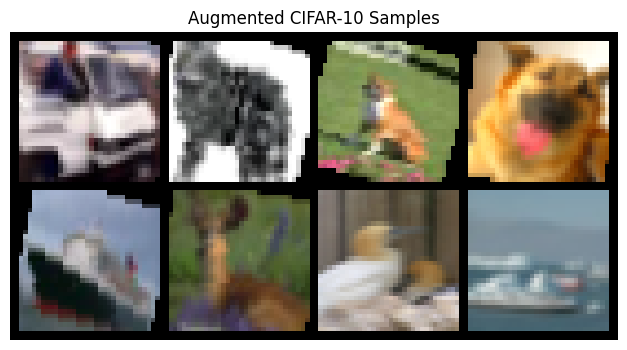

In [ ]:
plt.figure(figsize=(8, 4))
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.title('Augmented CIFAR-10 Samples')
plt.show()